# Introduction to neural networks


In this session we will start with a simple toy implementation of a neural network and apply it to the XOR problem. In the second part we will learn how to use the [Keras toolkit](https://keras.io/) to define, train and use a practical neural network model.

## XOR

Let's start with the [XOR problem](https://en.wikipedia.org/wiki/XOR_gate). 

In [3]:
import numpy
%pylab inline --no-import-all

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Exercise 7.1
Define the function `xor`, which which takes a Nx2 array, where each row is an input to the logical XOR. It outputs an array of size N with the corresponding outputs.

Given `X = numpy.array([[0, 0],      
                 [0, 1],      
                 [1, 0],      
                 [1, 1]])`
                 
`xor(X)` should output `[0, 1, 1, 0]`

In [4]:
def xor(X):
    #.........
    return (X.sum(axis=1) == 1).astype(int)

In [5]:
X = numpy.array([[0, 0],      # FALSE
                 [0, 1],      # TRUE
                 [1, 0],      # TRUE
                 [1, 1]])     # FALSE
y = xor(X)
print(y)

[0 1 1 0]


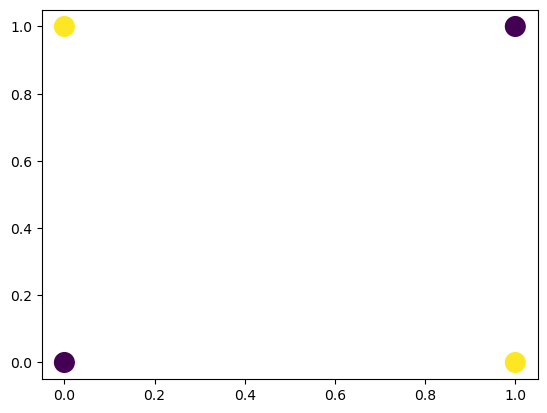

In [6]:
pylab.scatter(X[:,0], X[:,1], c=y, s=200)

## Neural network
We can define a simple two layer neural network by hand which solves the XOR classification problem. The network has parameters $\mathbf{W}$ and $\mathbf{U}$, and computes the following:

$$Y = \sigma(U(\sigma(WX^T))$$

Where $\mathbf{X}$ is the input array, with shape Nx2, $\mathbf{W}$ is a 2x2 matrix, and $\mathbf{U}$ is a 1x2 matrix. The result is a 1xN matrix (i.e. a single row vector) of XOR values.

### Exercise 7.2

Define function `sigma` which returns one if the input is greater than or equal to 0.5, and zero otherwise.

Given `X = numpy.array([[0.1, 0.3], [0.5, 0.7]])`
        
`sigma(X)` should output 

`[[0. 0.]
[1. 1.]]`

In [7]:
def sigma(X):
    #...............
    return (X>=0.5).astype(float)

In [9]:
z = numpy.random.uniform(0,1,(3,2))
print(z)
print(sigma(z))
print(sigma(numpy.array([[0.1, 0.3],
            [0.5, 0.7]])))

[[0.90345068 0.04455437]
 [0.70679061 0.67057994]
 [0.93991733 0.76245151]]
[[1. 0.]
 [1. 1.]
 [1. 1.]]
[[0. 0.]
 [1. 1.]]


### Exercise 7.3

Define function `nnet` which takes the weight matrices W and U, and the input X, and returns the result Y computed according to the formula above.

Given `X = numpy.array([[0, 0],      
                 [0, 1],      
                 [1, 0],      
                 [1, 1]])`
 
`W = numpy.array([[1,-1],
                 [-1,1]])`
                 
`U = numpy.array([1,1])`

`nnet(W, U, X)` should output `[0, 1, 1, 0]`

In [13]:
def nnet(W,U,X):
    Z=sigma(numpy.dot(W,numpy.transpose(X)))
    return sigma(numpy.dot(U,Z))


Define the weights:

In [14]:
W = numpy.array([[1,-1],
                 [-1,1]])
U = numpy.array([1,1])

Check what it outputs

In [15]:
y_pred = nnet(W, U, X)
print(y)
print(y_pred)


[0 1 1 0]
[0. 1. 1. 0.]


And plot the outputs as a function of inputs.

([], [])

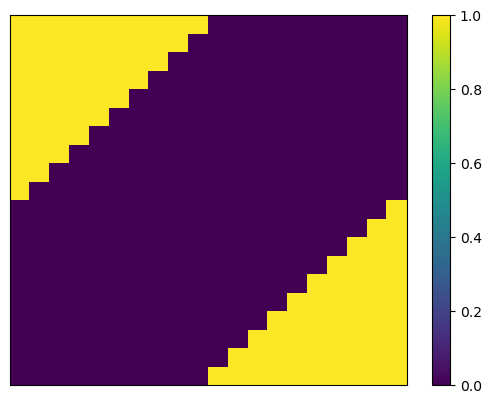

In [16]:
# Create a grid of points for plotting
shape=(20,20)
grid = numpy.array([ [i,j] for i in numpy.linspace(0,1,shape[0]) 
                               for j in numpy.linspace(0,1,shape[1]) ])
# Apply the neural net to all the points
y_pred = nnet(W, U, grid)
pylab.pcolor(y_pred.reshape((20,20)))
pylab.colorbar()
pylab.xticks([])
pylab.yticks([])

## Training XOR NN with Keras

We'll now learn how to build a simple neural network in Keras. 

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Add layers
model.add(Dense(32, input_dim=2))    # Input layer with 10 features
model.add(Activation('relu'))        # Activation function
model.add(Dropout(0.5))              # Dropout layer for regularization
model.add(Dense(1))                  # Output layer
model.add(Activation('sigmoid'))     # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


We can now train the model, specifying number of epochs, size of the minibatch, and whether to print extra information.

In [25]:
model.fit(X, y, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2667 - loss: 0.7495    
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8333 - loss: 0.7022  
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.5667 - loss: 0.7143
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.4667 - loss: 0.7190
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.8333 - loss: 0.6015
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2667 - loss: 0.7866  
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1000 - loss: 0.7757    
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.3056 - loss: 0.7160    
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.1000 - loss: 0.7201    
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.4333 - loss: 0.64899
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.5667 - loss: 0.6156
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/ste

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.4333 - loss: 0.6605  
Epoch 69/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.3667 - loss: 0.73657
Epoch 70/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 1.0000 - loss: 0.5988
Epoch 71/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8333 - loss: 0.5466  
Epoch 72/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 1.0000 - loss: 0.6297
Epoch 73/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.7333 - loss: 0.5906
Epoch 74/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.3667 - loss: 0.7382 
Epoch 75/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5667 - loss: 0.6442  
Epoch 76/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 1.0000 - loss: 0.5536
Epoch 77/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.3667 - loss: 0.70339
Epoch 78/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9000 - loss: 0.5863
Epoch 79/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.

In [26]:
print("   x1          x2          F(x1, x2)")
print(np.hstack([X, model.predict(X)]))

   x1          x2          F(x1, x2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
[[0.         0.         0.49950129]
 [0.         1.         0.54238069]
 [1.         0.         0.54790151]
 [1.         1.         0.45423815]]


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


([], [])

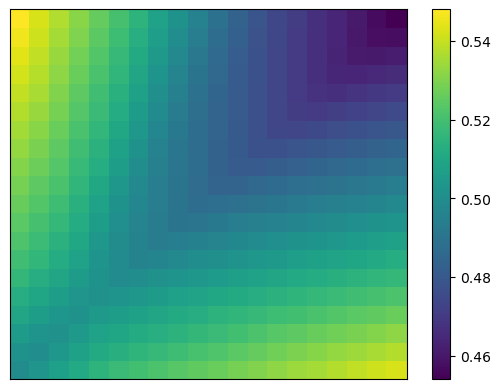

In [27]:
# Apply the neural net to all the points
y_pred = model.predict(grid)
pylab.pcolor(y_pred.reshape((20,20)))
pylab.colorbar()
pylab.xticks([])
pylab.yticks([])

## Regression with NN on iris

We will now define and train a neural network model for regression on the iris data.

### Load data

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
data = load_iris()
# Inputs
X = numpy.array(data.data[:,0:3], dtype='float32')
# Output
y = numpy.array(data.data[:,3], dtype='float32')


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=999)
print(X_train.shape)
print(y_train.shape)

(100, 3)
(100,)


### Exercise 7.4


Define a multilayer perceptron with the following specifications:
- Hidden layer 1: size 16, activation: tanh
- Hidden layer 2: size 16, activation: tanh
- Output layer: size 1, activation: linear

Compile it using the following specifications:
- optimizer: Adam
- loss: mean squared error

Train the network, and try to find a good value of learning rate by monitoring the loss.

Compute mean absolute error and r-squared the validation data.

In [85]:
model = Sequential()

model.add(Dense(32, input_dim=3, activation='tanh'))
model.add(Dense(32, activation='tanh'))

model.add(Dense(1, activation='linear'))

optimizer=Adam(learning_rate=0.08)
model.compile(optimizer=optimizer, loss='mse')

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_val)
print(mean_absolute_error(y_val, y_pred))
print(r2_score(y_val, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0.5746231
0.22500646114349365


## Classification

Let's now do classification. The target is a categorical vector. It will need to be transformed to an array of dummies. This transform is also called one-hot encoding.
This can be done manually, but sklearn.preprocessing has some utilities that make it simple:
- OneHotEncoder
- LabelBinarizer


In [87]:
# Inputs
X = numpy.array(data.data, dtype='float32')
# Output
y = numpy.array(data.target, dtype='int32')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=999)

# One-hot Indicator array for classes
from sklearn.preprocessing import LabelBinarizer
onehot = LabelBinarizer()
Y_train = onehot.fit_transform(y_train)
Y_val   = onehot.transform(y_val)

print(Y_train[:10,:])

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]]


### Exercise 7.5

Define a multilayer perceptron with the following specifications:
- Hidden layer 1: size 16, activation: tanh
- Hidden layer 2: size 16, activation: tanh
- Output layer: size 3, activation: softmax

NB: softmax is a generalization of inverse logit to more than 2 classes. It converts class scores to class probabilities, while making sure than they sum up to 1:

```
def softmax(x):
    z = numpy.exp(x)
    return z/numpy.sum(z)
```

Compile it using the following specifications:
- optimizer: Adam
- loss: categorical_crossentropy

Train the network, and try to find a good value of learning rate by monitoring the loss.
Use the method `.predict_classes` to predict the targets on validation data.
Compute the classification accuracy using `accuracy_score` from `sklearn.metrics` on validation data.

In [112]:
from tensorflow.keras import Input
model = Sequential()

model.add(Input(shape=(4,)))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))

model.add(Dense(3, activation='softmax'))

optimizer = Adam(learning_rate=0.10)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [113]:
from sklearn.metrics import accuracy_score

y_pred_prob = model.predict(X_val)

y_pred = np.argmax(y_pred_prob, axis=1)

y_val_labels = np.argmax(y_pred_prob, axis=1)  # Ensure validation labels match the format
accuracy = accuracy_score(y_val_labels, y_pred)
print(f"Accuracy Score: {accuracy}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy Score: 1.0


In [114]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(100, 4) (100,)
(50, 4) (50,)


In [115]:
print(np.unique(y_train, axis=0))
print(np.unique(y_val, axis=0))

[0 1 2]
[0 1 2]


In [118]:
print(y_pred_prob[:10])

[[0.26338887 0.28194055 0.45467058]
 [0.282335   0.2791826  0.43848243]
 [0.29719037 0.25800553 0.44480407]
 [0.39107534 0.23914894 0.36977574]
 [0.39974457 0.22298475 0.37727073]
 [0.3947252  0.23301406 0.3722608 ]
 [0.37481835 0.25678226 0.36839938]
 [0.29409316 0.26368654 0.4422203 ]
 [0.2514144  0.27679375 0.47179192]
 [0.38966882 0.23769578 0.37263542]]


In [119]:
print(y_pred[:10])

[2 2 2 0 0 0 0 2 2 0]


In [121]:
print(y_val_labels[:10])

[2 2 2 0 0 0 0 2 2 0]


### Exercise 7.6


Train a neural network classifier on the handwritten digits dataset. 
This dataset comes with scikit learn and can be accessed as follows:

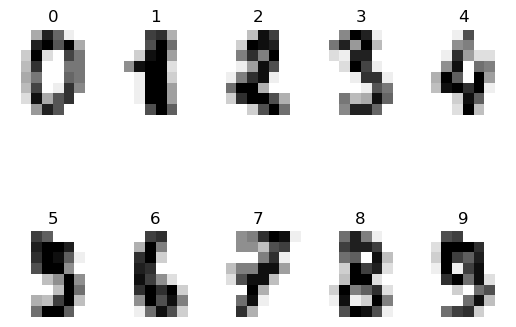

In [124]:
from sklearn.datasets import load_digits
digits = load_digits()
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:10]):
    pylab.subplot(2, 5, index + 1)
    pylab.axis('off')
    pylab.imshow(image,cmap=plt.cm.gray_r)
    pylab.title('%i' % label)

The targets are in `digits.target` and the pixel values flattened into an array are in `digits.data`.

Train a classifier on the first 1000 of the images, and evaluate on the rest. 
Before testing the neural network model, check the classification error rate of a logistic regression classifier as a baseline using `LogisticRegression` from `sklearn.linear_model`.


Remember to convert the targets to the one-hot representation for training the neural network using `LabelBinarizer`.

Some things to try when training a neural network model for this dataset:

- start with two or three hidden layers
- use between 32 to 128 units in each layer
- try different learning rates in the Adam optimizer (lr=0.001, lr=0.0001) and monitor the loss function
- train for at least 100 epochs
- try the `relu` activation function instead of `tanh`



In [141]:
from sklearn.linear_model import LogisticRegression

X = digits.images
y = digits.target

X_train = digits.images[:1000,:]
y_train = digits.target[:1000]
X_test = digits.images[1000:,:]
y_test = digits.target[1000:]

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

onehot=LabelBinarizer()
Y_train = onehot.fit_transform(y_train)
Y_test = onehot.fit(y_test)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy_score(y_test, y_pred)

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9272271016311167

In [140]:
print(X_train.shape)
print(y_train.shape)

(1000, 8, 8)
(1000,)


In [160]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))

model.add(Dense(10, activation='softmax'))
          
optimizer=Adam(learning_rate=0.0001)
          
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=1)


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 2.4723
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 2.0119
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 1.7287
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 1.4737
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 1.2762
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 1.1019
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 0.9322
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 0.8452
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.7390
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.6742
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 0.5690
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 0.5306
Epoch 13/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 0.4762
Epoch 14/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.4394
Epoch 15/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.0102
Epoch 81/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.0096
Epoch 82/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.0090
Epoch 83/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.0093
Epoch 84/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.0088
Epoch 85/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.0084
Epoch 86/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.0078
Epoch 87/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.0080
Epoch 88/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 0.0077
Epoch 89/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.0067
Epoch 90/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.0067
Epoch 91/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.0065
Epoch 92/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.0065
Epoch 93/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.0061
Epoch 94/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 387u

In [149]:
print(y_train.shape)

(1000,)


In [152]:
print(Y_train.shape)
print(X_train.shape)

(1000, 10)
(1000, 64)
